In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("cgpa_package.csv")

df = pd.DataFrame(data)
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

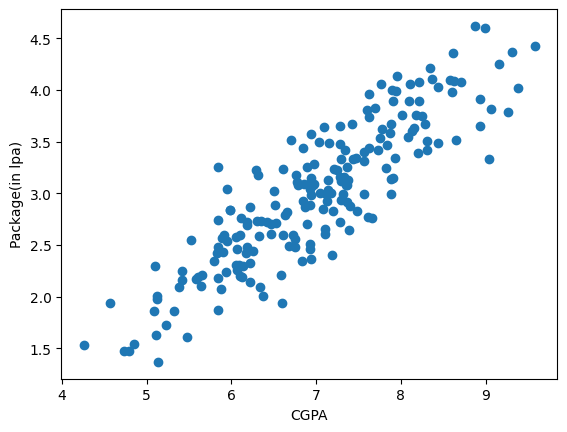

In [3]:
plt.scatter(df['cgpa'],df['package'])

plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
# @title

x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

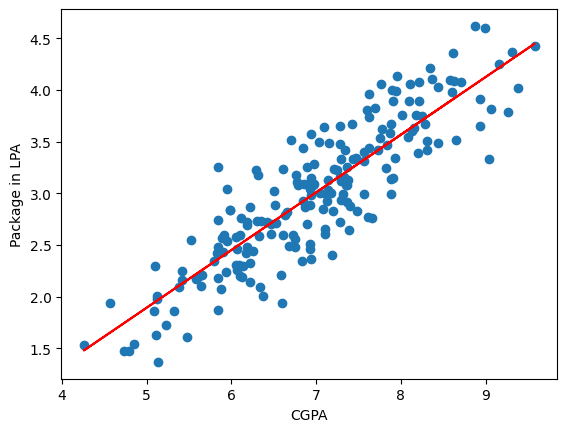

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [8]:
# plt.plot(df['cgpa'],df['package'])
# plt.plot(x_train,lr.predict(x_train),color='red')

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
y_pred = lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [11]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [12]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [13]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [14]:
print('MSE', r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
r2

MSE 0.780730147510384


0.780730147510384

In [15]:
# Adjusted R² = 1 - ((1-R²)(N-1) / (N-p-1))

# Where

#         R² Sample R-Squared

#         N. Total Sample Size

#         p. Number of independent variable

# The formula for Adjusted R-Squared

In [16]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [17]:

# Coefficient of determination

# R^2 = 1 - ({RSS}/{TSS})


# R^2	=	coefficient of determination
# RSS	=	sum of squares of residuals
# TSS	=	total sum of squares



In [18]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.704504,3.26
1,5.12,0.608807,1.98
2,7.82,0.488739,3.25
3,7.42,0.977533,3.67
4,6.94,0.261355,3.57


Text(0, 0.5, 'Package(in lpa)')

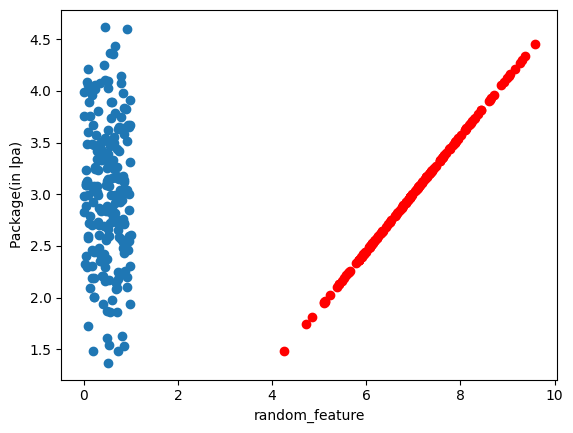

In [19]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.scatter(x_train,lr.predict(x_train),color='red')
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [20]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.7803981278873467


In [26]:
1-((1-r2)*(40-1)/(40-1-2))

0.7685277564217979

In [27]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [28]:
new_df2.sample(5)

,cgpa,iq,package
21,6.85,3.13,2.93
153,7.94,3.39,3.99
48,8.63,3.89,4.09
179,7.14,2.23,3.03
66,5.11,0.63,1.63


Text(0, 0.5, 'Package(LPA)')

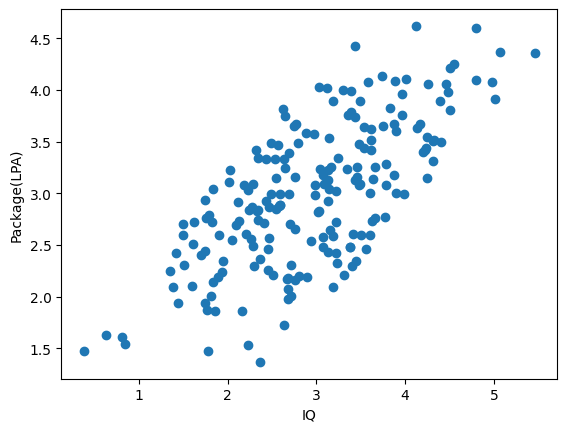

In [30]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel("Package(LPA)")

For Creating Pickle File

In [32]:
import pickle

In [33]:
import pickle
with open('dataset.pkl', 'wb') as file:
    pickle.dump(lr, file)

print("Dataset saved to 'dataset.pkl'")

Dataset saved to 'dataset.pkl'
